In [1]:
# Loading essential python packages
import pandas as pd # main package
import numpy as np
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose # for seasonality
import statsmodels.graphics.tsaplots as sgt # for acf and pacf
from pmdarima import auto_arima
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tools.eval_measures import rmse, meanabs# model evaluation

# Data Load and Cleaning

In [2]:
# Load data from csv file and convert posting_date from string/object to datetime format
gbp_volume = pd.read_csv('take_home_task_dataset.csv', parse_dates =['posting_date'] ,date_format = '%Y-%m-%d')
pd.set_option('display.max.rows', 270)
gbp_volume
#gbp_volume['posting_date'] = pd.to_datetime(arg = gbp_volume['posting_date'], format ='%Y-%m-%d')

,posting_date,volume_gbp
0,2023-04-01,0.00
1,2023-04-02,170487.18
2,2023-04-03,250508.04
3,2023-04-04,611955.31
4,2023-04-05,282503.79
5,2023-04-06,98214.34
6,2023-04-07,0.00
7,2023-04-08,133.93
8,2023-04-09,0.00
9,2023-04-10,146062.75


In [3]:
# Check dataset info
gbp_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posting_date  253 non-null    datetime64[ns]
 1   volume_gbp    253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [4]:
#gbp_volume['is_duplicated'] = gbp_volume.duplicated()
# Check unique records
gbp_volume.nunique()

posting_date    253
volume_gbp      244
dtype: int64

In [5]:
# Check for nulls
gbp_volume.isnull().sum()

posting_date    0
volume_gbp      0
dtype: int64

In [6]:
# Records with 0 trasfer volume
zero_volume_days = gbp_volume[gbp_volume['volume_gbp'] == 0]
zero_volume_days

,posting_date,volume_gbp
0,2023-04-01,0.0
6,2023-04-07,0.0
8,2023-04-09,0.0
36,2023-05-07,0.0
49,2023-05-20,0.0
57,2023-05-28,0.0
70,2023-06-10,0.0
76,2023-06-16,0.0
237,2023-12-16,0.0
238,2023-12-17,0.0


In [7]:
# The zero volume trasnfers seem to be occuring mostly during weekends

In [8]:
# Create a DataFrame that includes Business Days Only
gbp_volume.set_index('posting_date', inplace=True)
gbp_volume_including_all_business_days = gbp_volume.asfreq('B') 
gbp_volume_business_days = gbp_volume.join( other = gbp_volume_including_all_business_days , on = 'posting_date', how = 'inner', rsuffix = '_right_table' )
gbp_volume_business_days = gbp_volume_business_days.loc[:, gbp_volume.columns]
gbp_volume_business_days

,volume_gbp
posting_date,
2023-04-03,250508.04
2023-04-04,611955.31
2023-04-05,282503.79
2023-04-06,98214.34
2023-04-07,0.00
2023-04-10,146062.75
2023-04-11,478821.47
2023-04-12,415103.34
2023-04-13,232508.35


In [9]:
# Create a DataFrame for Non Business Days. Not sure if we will use later but good to have here
gbp_volume_non_business_days = gbp_volume.loc[~gbp_volume.index.isin(gbp_volume_business_days.index)]
gbp_volume_non_business_days

,volume_gbp
posting_date,
2023-04-01,0.00
2023-04-02,170487.18
2023-04-08,133.93
2023-04-09,0.00
2023-04-15,1016.54
2023-04-16,111580.14
2023-04-22,398.31
2023-04-23,130016.86
2023-04-29,99.07


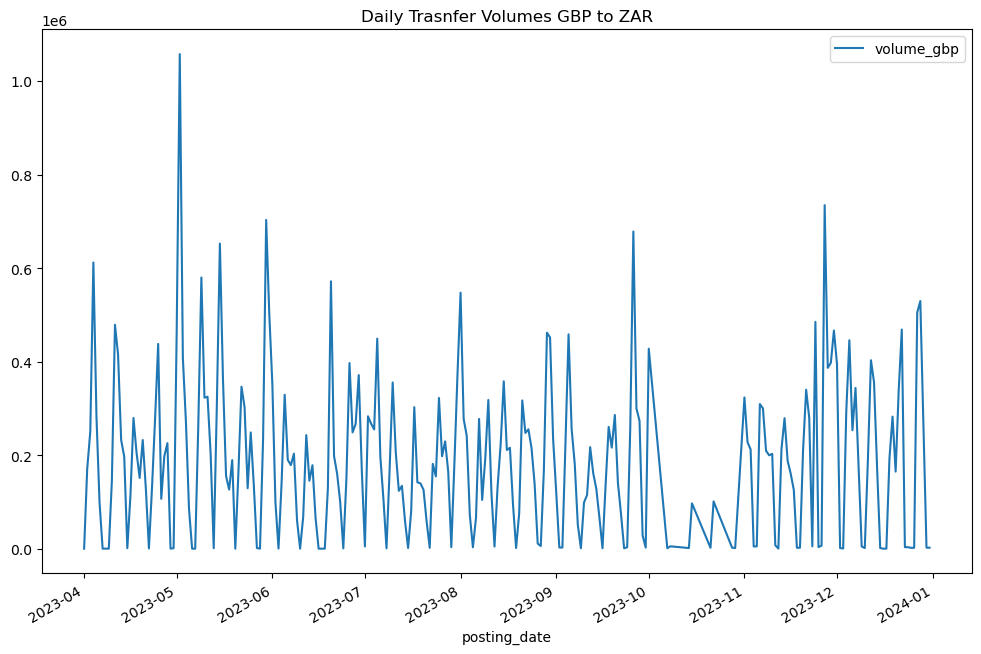

In [10]:
gbp_volume.plot(legend = True, figsize = (12,8))
plt.title('Daily Trasnfer Volumes GBP to ZAR')
plt.show()

In [11]:
# Use the describe method to derive descriptive statistics about the original dataset
gbp_volume['volume_gbp'].describe().apply(lambda x: round(x,2))

count        253.00
mean      188490.74
std       169578.20
min            0.00
25%         7220.96
50%       170487.18
75%       278451.21
max      1057540.77
Name: volume_gbp, dtype: float64

In [12]:
# Do the same for the business-days-only dataset
gbp_volume_business_days['volume_gbp'].describe().apply(lambda x: round(x,2))

count        173.00
mean      256106.89
std       156739.46
min            0.00
25%       154597.18
50%       227678.29
75%       323508.76
max      1057540.77
Name: volume_gbp, dtype: float64

In [13]:
# Do the same for the non-business-days dataset
gbp_volume_non_business_days['volume_gbp'].describe().apply(lambda x: round(x,2))

count        80.00
mean      42270.83
std       81113.26
min           0.00
25%         874.56
50%        2243.56
75%       66189.11
max      427617.37
Name: volume_gbp, dtype: float64

# 1 a) Describe the distribution that our daily transfer volumes follow.

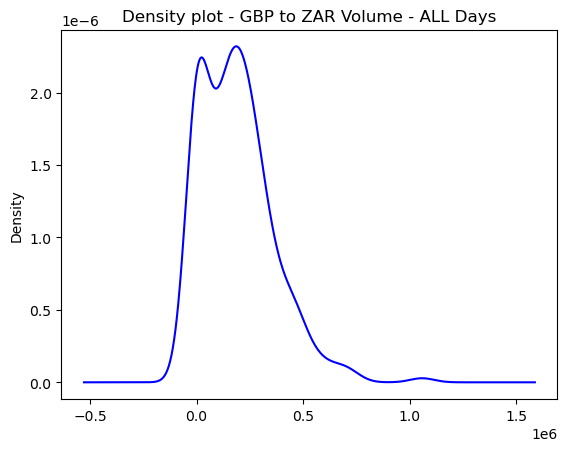

In [14]:
# Density plot for the original dataset. This helps visualise the distribution of data
gbp_volume.volume_gbp.plot.density(color='blue')#, title = 'Density plot - GBP to ZAR Volume - ALL Days') 
plt.title('Density plot - GBP to ZAR Volume - ALL Days') 
plt.show()

The Density plot illustrates the presence of 2 peaks/modes which are most likely driven by different customer behaviours or segments.

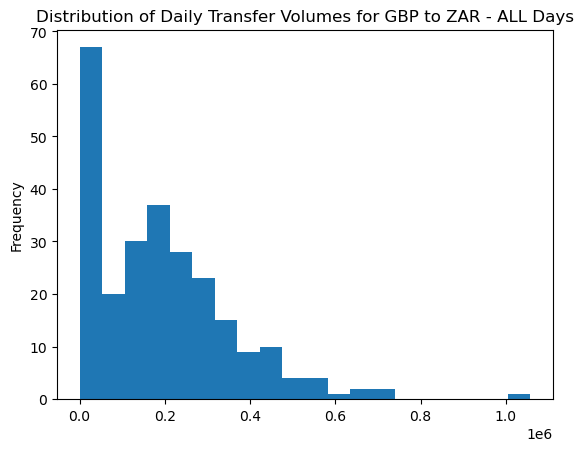

In [15]:
# Histogram for the Original Dataset that includes All Days. On its own
gbp_volume['volume_gbp'].plot.hist(bins = 20)
plt.title('Distribution of Daily Transfer Volumes for GBP to ZAR - ALL Days')
plt.show()

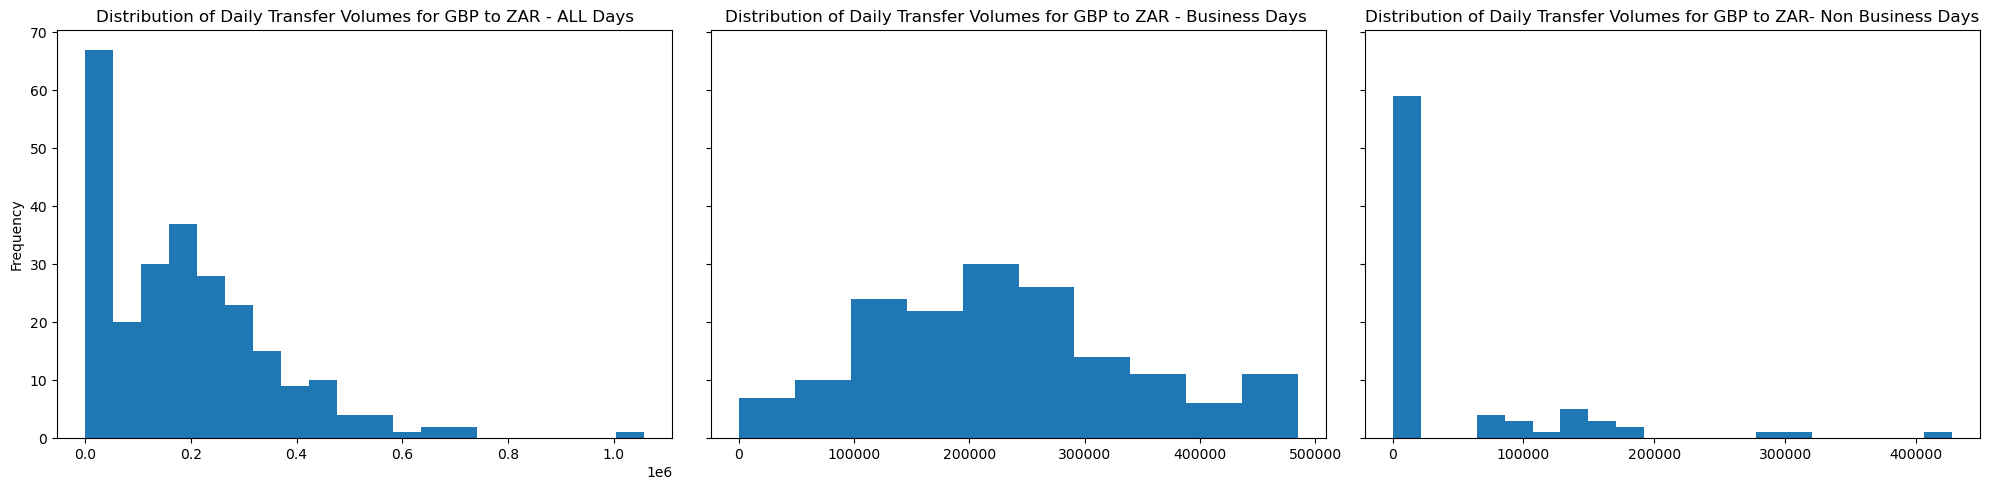

In [16]:
# Histogram to visualise further the distibution of the data.
# 3 Histograms are inlcluded for comparison:The original, the business-days and the non-business-days datasets respectively.

# Create a single figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# Histogram for the Original Dataset that includes All Days
gbp_volume['volume_gbp'].plot.hist(bins = 20, ax=axs[0])
axs[0].set_title('Distribution of Daily Transfer Volumes for GBP to ZAR - ALL Days')

# Histogram for the Business-Days-Only Dataset excluding outliers
gbp_volume_business_days = gbp_volume_business_days[gbp_volume_business_days['volume_gbp'] <= 500000]
gbp_volume_business_days['volume_gbp'].plot.hist(bins = 10, ax=axs[1])
axs[1].set_title('Distribution of Daily Transfer Volumes for GBP to ZAR - Business Days ')

# Histogram for the Non-Business-Days Dataset
gbp_volume_non_business_days['volume_gbp'].plot.hist(bins = 20, ax=axs[2])
axs[2].set_title('Distribution of Daily Transfer Volumes for GBP to ZAR- Non Business Days')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- The main histogram on the left, shows a positively skewed distribution meaning that most transactions are concentrated in lower volumes, i.e., between 0 and £100k. There is a second peak too around the £200k-£250k range which is more visible when we look in the Business Days Only (mid plot).
- Also, on the left plot, the long tail extends towards higher values with some outliers.
- The mid plot resembles a normal distribution. 

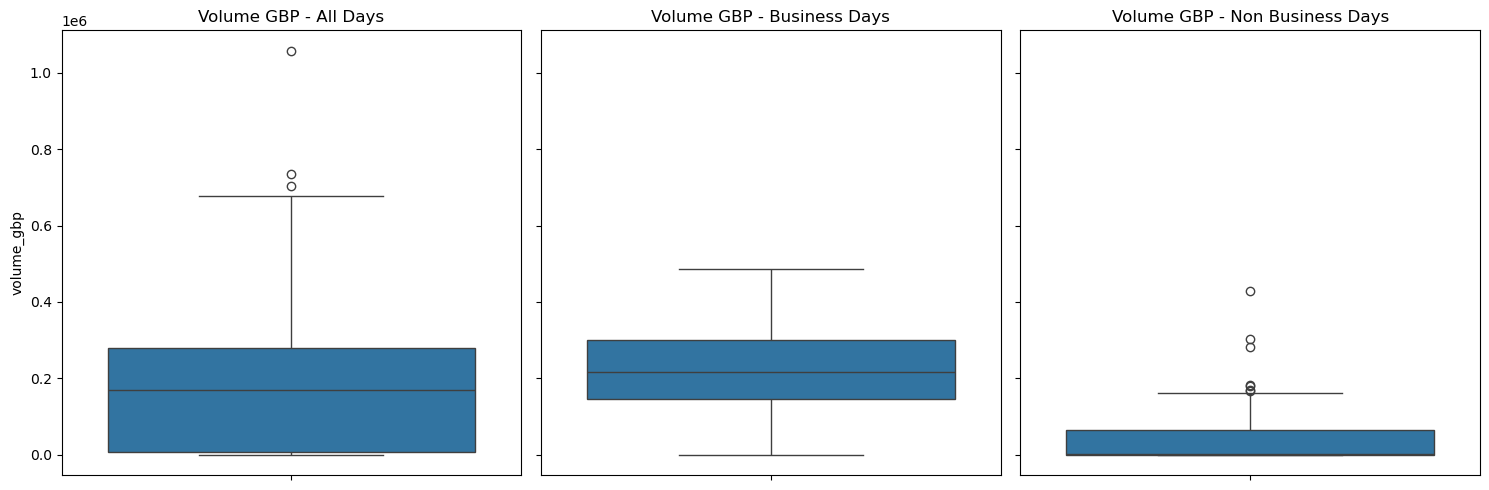

In [17]:
# Another plot to visualise the distribution and outliers of the data, side by side, is the box and whisker plot.

# Create a single figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Box plot for the Original Dataset that includes All Days
sns.boxplot(data=gbp_volume, y='volume_gbp', ax=axs[0])
axs[0].set_title('Volume GBP - All Days')

# Box plot for the Business-Days-Only Dataset excluding outliers
sns.boxplot(data=gbp_volume_business_days, y='volume_gbp', ax=axs[1])
axs[1].set_title('Volume GBP - Business Days')

# Box plot for the Non-Business-Days Dataset
sns.boxplot(data=gbp_volume_non_business_days, y='volume_gbp', ax=axs[2])
axs[2].set_title('Volume GBP - Non Business Days')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Within the blue boxes lie 50% of the data while the dark line within the box is the median.
We see that the median for the Business Days Only data set (mid plot) is higher than that of the Original Dataset (left plot)

# 1 b) Real-world cause for this shape.

- The data reveal that on business days there is typically higher transaction volume.
- This might be driven by how business and personal accounts behave in general, in terms of transactions.

# 1c) Implications for analysis

This bimodal yet positively skewed distribution can have implications on further analysis.
- The 2 peaks in the data provide a strong case for a split in the data. 
- Measures of central tendency should be used with caution as the mean is not the best measure to describe the data. The median is   preferred (the mean will be heavily influenced by outliers).
- Statistical methods like hypothesis testing and regression analysis assume the data are normally distributed. The skewed nature might require the use of logarithmic transformation in order to normalize the data or it might require the split of the data  to follow normal distribution (e.g., the Business Days dataset).
- Forecasting: Predictive models should account for this bimodal behavior, as time series models might struggle due to the high variability in the data.

# 2 Quarterly Volume Changes

In [18]:
# Group by quarter for the Original Dataset (All days)
gbp_volume.reset_index(inplace= True) 
gbp_volume_by_quarter_all_days_describe = gbp_volume.groupby(gbp_volume['posting_date'].dt.to_period('Q').dt.start_time)['volume_gbp'].agg(
total='sum', mean='mean', std='std', count='count', min = 'min', max = 'max'
)
gbp_volume_by_quarter_all_days_describe

,total,mean,std,count,min,max
posting_date,,,,,,
2023-04-01,18919209.96,207903.406154,189846.745391,91,0.00,1057540.77
2023-07-01,16051757.99,174475.630326,137245.470555,92,747.98,678253.58
2023-10-01,12717190.23,181674.146143,179904.255582,70,0.00,734550.98


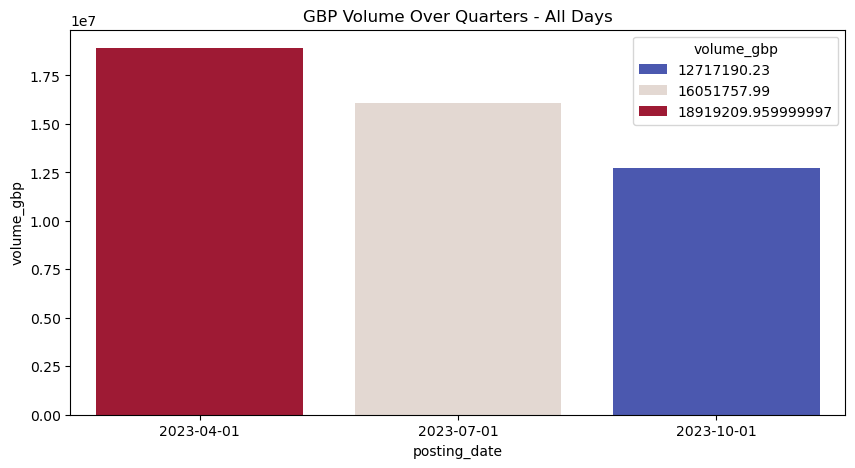

In [19]:
gbp_volume_by_quarter_all_days = gbp_volume.groupby(gbp_volume['posting_date'].dt.to_period('Q').dt.start_time)['volume_gbp'].sum()
gbp_volume_by_quarter_all_days = pd.DataFrame(gbp_volume_by_quarter_all_days) # convert into a  dataframe

# Plot Quarterly comparison for the Original Dataset
plt.figure(figsize = (10,5))
barplot = sns.barplot(data = gbp_volume_by_quarter_all_days, x = 'posting_date', y = 'volume_gbp', hue='volume_gbp', palette = 'coolwarm' )
#barplot.set_title('GBP Volume Over Quarters - All Days')
plt.title('GBP Volume Over Quarters - All Days')
plt.show()

Hypothesis testing is needed to check if the differences in daily transfer volumes between quarters are due to randomness in the data or due to 'real' changes.
- ANOVA TEST:
  Null Hypothesis: The mean daily transfer volume is the same across all quarters.
  Alternative Hypothesis: At least one quarter has a different mean daily transfer volume compared to the others.
  If the p-value from the ANOVA test is less than 0.05, we reject the null hypothesis.

In [20]:
# ANOVA TEST 

from scipy.stats import f_oneway

# Group volumes by quarter
volumes_by_quarter = [
    gbp_volume[gbp_volume['posting_date'].dt.to_period('Q') == q]['volume_gbp'] 
    for q in gbp_volume['posting_date'].dt.to_period('Q').unique()  # dynamic filtering/grouping of data by creating separate group per Q
]

# Perform ANOVA test
anova_result = f_oneway(*volumes_by_quarter)

# Display the p-value
print(f"ANOVA p-value: {anova_result.pvalue}")
#print("ANOVA p-value: " + str(float(anova_result.pvalue)))

ANOVA p-value: 0.3817264213239653


Statistical Significance:
- The ANOVA test results in a p-value of 0.38, suggesting no significant differences in transfer volumes between quarters. 
- Observed variations may result from background fluctuations rather than real changes.
- The ANOVA (Analysis of Variance) test is used to compare the mean transfer volumes across different quarters.
- It's a parametric test that assumes the data within groups is normally distributed.
- The ANOVA test is sufficient but since we know from the histogram that the original dataset does not follow a normal distribution (we can also validate that with a Shapiro-Wilk hypothesis testing) we could also perform another test which is assumes that the data do not follow a normal distrubution (Added it in the Appendix section at the end).

# 3. October 2023 Transfer Volume Estimate

# Steps for estimating future volumes using ARIMA models
1. Check for stationarity with ADF test
2. Run autoarima
3. Split the dataset into training and test set
4. Forecast
5. Evaluate model
6. Forecast into the unknown future

# Stationarity- AD Fuller test

In [21]:
# Dickey Fuller Test for testing if the Original Dataset is stationary

# Testing the Original Dataset
adf_result = sts.adfuller(gbp_volume['volume_gbp'])
print(f"ADF Statistic = {adf_result[0]}")
print(f"P-Value = {adf_result[1]}")

if adf_result[1] > 0.05:
    print("Data is non stationary")
else:
    print("Data is stationary")

ADF Statistic = -4.383038368060945
P-Value = 0.0003180352065623539
Data is stationary


No need to perform any data transformation, such as differencing as the original data are already stationary.

In [22]:
# Testing the Business-Days-Only dataset
adf_result_b_days = sts.adfuller(gbp_volume_business_days['volume_gbp'])
if adf_result_b_days[1] > 0.05:
    print("Data is non stationary")
else:
    print("Data is stationary")

Data is stationary


In [23]:
# Testing the Non-Business-Days-Only dataset
adf_result_non_b_days = sts.adfuller(gbp_volume_non_business_days['volume_gbp']) 
if adf_result_non_b_days[1] > 0.05:
    print("Data is non stationary")
else:
    print("Data is stationary")

Data is non stationary


# Seasonality

<Figure size 1200x800 with 0 Axes>

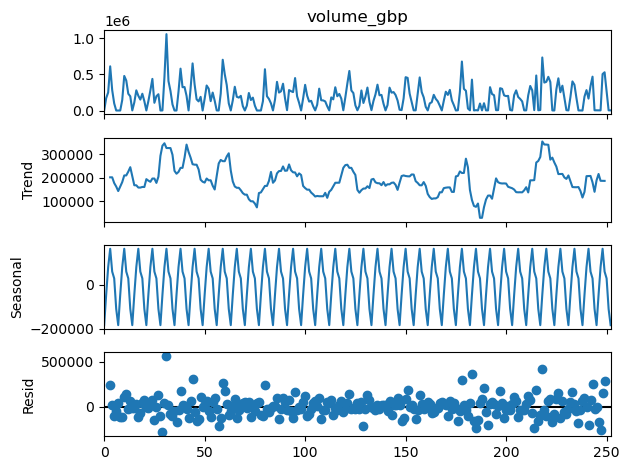

<Figure size 2000x1000 with 0 Axes>

In [24]:
# Use seasonal_decompose to spot seasonality in the Original Dataset
plt.figure(figsize=(12, 8))
s_dec_additive = seasonal_decompose(gbp_volume['volume_gbp'], period = 7 ) # weeks 
s_dec_additive.plot()
plt.figure(figsize=(20,10))
plt.show()

There seems to be presence of seasonality.

# PMDARIMA LIBRARY

# 1. ARIMA -  ALL DAYS 

In [25]:
# Run auto_arima to determine the best model based on AIC criterion (the model with the lowest AIC is selected)
stepwise_fit_1m = auto_arima(gbp_volume['volume_gbp'], start_p = 0, start_q = 0, max_p=6, max_q=6, seasonal= False, trace=True) 
stepwise_fit_1m.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7015.845, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6832.432, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6877.946, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6833.204, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6832.051, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6826.843, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6825.600, Time=0.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=6825.721, Time=0.01 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=6764.660, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=6745.822, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=6799.001, Time=0.04 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=6733.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  253
Model:               SARIMAX(6, 0, 2)   Log Likelihood               -3356.697
Date:                Sun, 05 Jan 2025   AIC                           6731.394
Time:                        21:56:38   BIC                           6763.195
Sample:                             0   HQIC                          6744.189
                                - 253                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3927      0.191      7.277      0.000       1.018       1.768
ar.L2         -1.0537      0.269     -3.917      0.000      -1.581      -0.526
ar.L3          0.5202      0.182      2.853      0.004       0.163       0.878
ar.L4         -0.2614      0.152     -1.716      0.086      -0.560       0.037
ar.L5          0.1625      0.144      1.130      0.259      -0.119       0.444
ar.L6          0.2082      0.110      1.890      0.059      -0.008       0.424
ma.L1         -0.9498      0.183     -5.200      0.000      -1.308      -0.592
ma.L2          0.4525      0.174      2.594      0.009       0.111       0.794
sigma2      2.172e+10   4.35e-11   4.99e+20      0.000    2.17e+10    2.17e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               166.43
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             1.05
Prob(H) (two-sided):                  0.80   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.18e+36. Standard errors may be unstable.
"""

In [26]:
# The ARIMA model with order (6, 0, 2) is preferred

In [27]:
# We need to split the data between train and test set 
gbp_volume.set_index('posting_date', inplace=True)
train = gbp_volume.loc[:'2023-08-31']
train = train.asfreq('D') 
test = gbp_volume.loc['2023-09-01':'2023-09-30']
test = test.asfreq('D')

In [28]:
# Fit the best model using the train dataset
arima_model_6_0_2 = ARIMA(train['volume_gbp'], order=(6, 0, 2))
results_arima_model_6_0_2 = arima_model_6_0_2.fit()
results_arima_model_6_0_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             volume_gbp   No. Observations:                  153
Model:                 ARIMA(6, 0, 2)   Log Likelihood               -2007.597
Date:                Sun, 05 Jan 2025   AIC                           4035.194
Time:                        21:56:38   BIC                           4065.498
Sample:                    04-01-2023   HQIC                          4047.504
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.976e+05   3.08e-06   6.42e+10      0.000    1.98e+05    1.98e+05
ar.L1          1.5453      0.103     15.038      0.000       1.344       1.747
ar.L2         -1.5986      0.191     -8.367      0.000      -1.973      -1.224
ar.L3          0.7592      0.278      2.734      0.006       0.215       1.303
ar.L4         -0.4237      0.341     -1.241      0.215      -1.093       0.245
ar.L5          0.1456      0.273      0.533      0.594      -0.390       0.681
ar.L6          0.0247      0.156      0.158      0.875      -0.282       0.331
ma.L1         -1.2135      0.045    -27.154      0.000      -1.301      -1.126
ma.L2          0.9723      0.047     20.542      0.000       0.880       1.065
sigma2      1.646e+10   1.05e-11   1.57e+21      0.000    1.65e+10    1.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               152.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+37. Standard errors may be unstable.
"""

In [29]:
# Identify start and end points for predictions. 
# We are using all available data from 1-Apr-2023 up to 31-Aug-2023 in order to test for September.
# We will compare the model's performance against September's actual volumes to evaluate the model.
start = len(train)
end = len(train) + len(test) - 1
predictions_arima_model_6_0_2 = results_arima_model_6_0_2.predict(start=start, end=end).rename('ARIMA(6,0,2) Predictions')

In [30]:
predictions_arima_model_6_0_2

2023-09-01     93321.578584
2023-09-02     87034.881742
2023-09-03    151024.317237
2023-09-04    251325.753697
2023-09-05    326862.474341
2023-09-06    308642.928142
2023-09-07    204385.519503
2023-09-08     96414.765919
2023-09-09     66580.804888
2023-09-10    135121.875204
2023-09-11    250144.529433
2023-09-12    325786.184272
2023-09-13    305182.647695
2023-09-14    203698.906304
2023-09-15     97748.875664
2023-09-16     67004.488339
2023-09-17    134402.884216
2023-09-18    249129.666340
2023-09-19    324938.354615
2023-09-20    304946.780614
2023-09-21    204318.540718
2023-09-22     98775.559576
2023-09-23     67615.113699
2023-09-24    134127.090690
2023-09-25    248188.991006
2023-09-26    324038.598536
2023-09-27    304756.832515
2023-09-28    204980.306615
2023-09-29     99792.218538
2023-09-30     68221.498915
Freq: D, Name: ARIMA(6,0,2) Predictions, dtype: float64

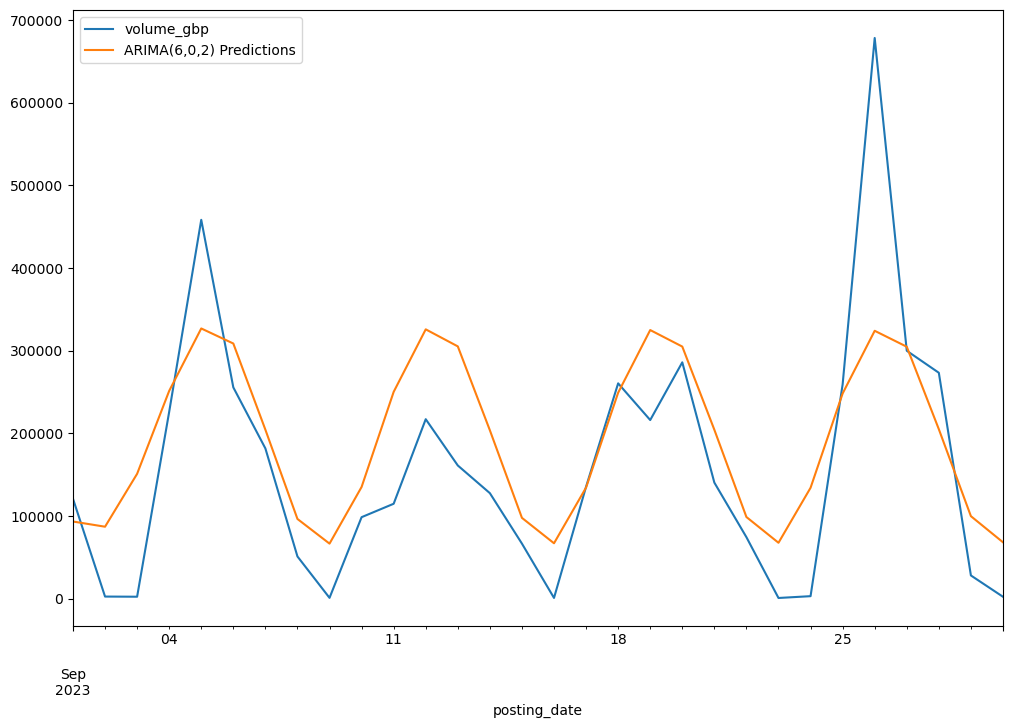

In [31]:
test['volume_gbp'].plot(legend = True, figsize = (12,8))
predictions_arima_model_6_0_2.plot(legend = True, figsize = (12,8))
plt.show()

# Model evaluation

Evaluate the model using RMSE (Root Mean Squared Error) 

In [32]:
mae = meanabs(test['volume_gbp'], predictions_arima_model_6_0_2)
mae

73488.18860938204

In [33]:
error = rmse(test['volume_gbp'], predictions_arima_model_6_0_2)
error

99900.96077392028

In [34]:
test['volume_gbp'].mean()

158117.8123333333

In [35]:
error/test['volume_gbp'].mean()

0.6318134516262837

- From the plot above, we see that the predicted data fit quite well against the actual volumes.
- The only instances that our model's accuracy struggled is during periods of high data variability.
- The RMSE is approximately 63% of the test set's mean value (£158K), indicating not a strong but a somewhat acceptable error level for this time series forecasting. We will see if this error can be improved later when we account also for seasonality in our sarima model.


# Forecast into the future

In [36]:
# forecast for October 2023
forecast_arima = results_arima_model_6_0_2.predict(start=start+30, end = end + 31).rename('ARIMA(6,0,2) Forecast')

<Axes: xlabel='posting_date'>

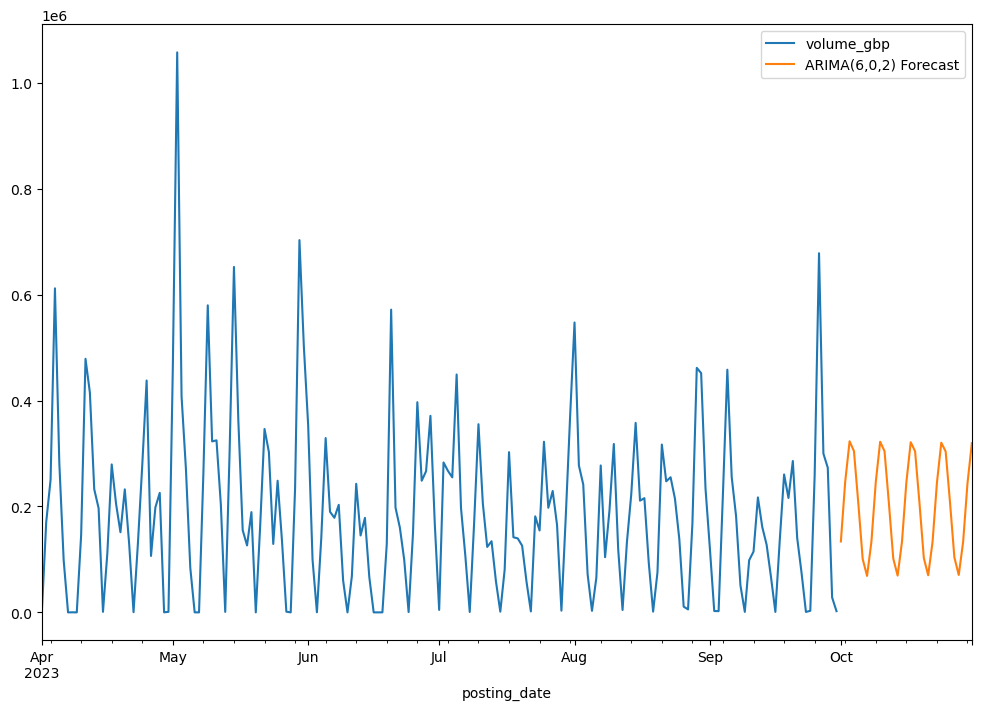

In [37]:
gbp_volume_up_to_oct = gbp_volume.loc[:'2023-09-30']
gbp_volume_up_to_oct['volume_gbp'].plot(legend = True, figsize= (12,8))
forecast_arima.plot(legend = True)

# Ranges and Certainty


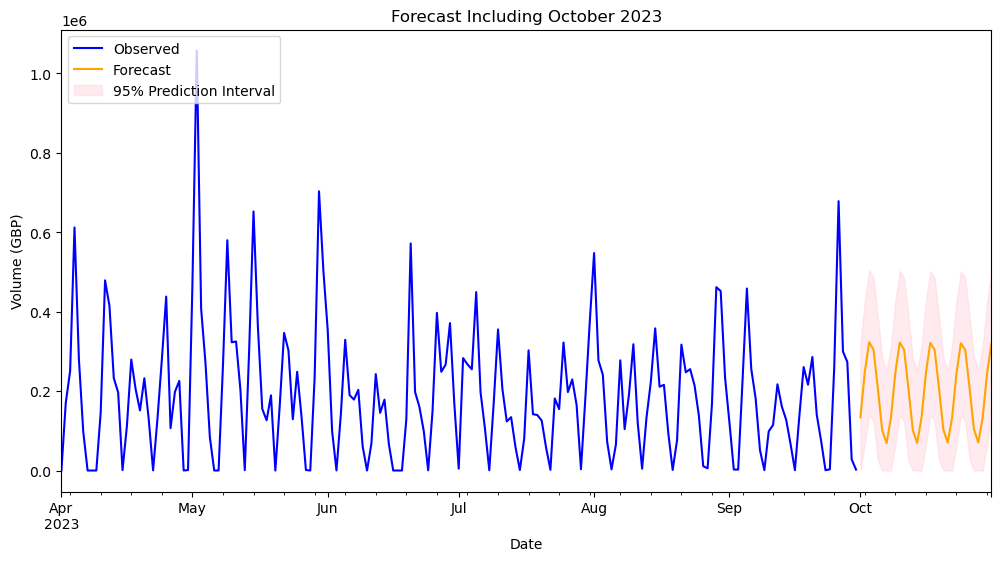

In [38]:
# Plot observed data and forecast
plt.figure(figsize=(12, 6))
gbp_volume_up_to_oct['volume_gbp'].plot(label='Observed', color='blue')
forecast_arima.plot(label='Forecast', color='orange')
plt.fill_between(
    forecast_arima.index, # x-axis (time)
    np.maximum(forecast_arima - 1.96 * forecast_arima.std(), 0),  # Lower bound limited to 0
    forecast_arima + 1.96 * forecast_arima.std(),  # Upper bound remains as is
    color='pink', # Fill color for the shaded area
    alpha=0.3,  # Transparency of the shading
    label='95% Prediction Interval'  # Legend label
)
plt.legend(loc='upper left')
plt.title('Forecast Including October 2023')
plt.xlabel('Date')
plt.ylabel('Volume (GBP)')
plt.show()

Evaluate the model based on both the RMSE (Root Mean Squared Error) and the Mean Absolute Error (MAE)

In [39]:
# Calculate RMSE for the test data (as already done)
error = rmse(test['volume_gbp'], predictions_arima_model_6_0_2)
print(f"Root Mean Squared Error (RMSE): {error:.2f}")

# Relative RMSE to assess certainty
relative_rmse = error / test['volume_gbp'].mean()
certainty_score_error = (1 - relative_rmse) * 100
print(f"Certainty score (based on RMSE): {certainty_score_error:.2f}%")

Root Mean Squared Error (RMSE): 99900.96
Certainty score (based on RMSE): 36.82%


In [40]:
# Calculate Mean Absolute Error for the test data
mae = meanabs(test['volume_gbp'], predictions_arima_model_6_0_2)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Certainty score based on Mean Absolute Error
relative_mae = mae / test['volume_gbp'].mean()
certainty_score_mae = (1 - relative_mae) * 100
print(f"Certainty score (based on MAE): {certainty_score_mae:.2f}%")


Mean Absolute Error (MAE): 73488.19
Certainty score (based on MAE): 53.52%


- Based on RMSE, the model explains approximately 37% of the variability in historical data for the October forecast.
- Based on MAE, the model accounts for approximately 54% of the variability in historical data for the October forecast.
- RMSE: Measures the square root of the average squared errors, giving more weight to large errors, making it sensitive to outliers.
- MAE: Measures the average absolute errors, treating all errors equally without amplifying the impact of large errors.
- https://hmatalonga.com/blog/choosing-between-mae-mse-and-rmse/
- RMSE is used in finance to measure the accuracy of financial forecasting models. MSE is used in regression when the target is normally distributed and large errors should be penalized more than small ones.
- https://www.statology.org/mse-vs-rmse/

# 2. SARIMA - ALL Days

- We have seen that there is presence of seasonality in the dataset. 
- Below we try to incorporate seasonality in order to see if the new model will improve the previous one.

In [41]:
# Run auto_arima to determine the best model based on AIC criterion. With m = 7 as time period for seasonal differencing 
stepwise_fit_7m = auto_arima(gbp_volume['volume_gbp'], start_p = 0, start_q = 0, max_p=7, max_q=7, seasonal= True, trace=True, m =7) 
stepwise_fit_7m.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=6777.531, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=6813.762, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=6747.403, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=6735.112, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=7015.845, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=6760.637, Time=0.01 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=6731.782, Time=0.11 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=6731.470, Time=0.03 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=6731.385, Time=0.07 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=6727.980, Time=0.19 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=6732.387, Time=0.19 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=6765.124, Time=0.23 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=6724.507, Time=0.46 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  253
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 7)   Log Likelihood               -3353.228
Date:                            Sun, 05 Jan 2025   AIC                           6720.457
Time:                                    21:56:46   BIC                           6745.191
Sample:                                         0   HQIC                          6730.408
                                            - 253                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.028e+05    4.7e+04      4.311      0.000    1.11e+05    2.95e+05
ar.L1         -0.9242      0.076    -12.219      0.000      -1.072      -0.776
ma.L1          1.3260      0.110     12.076      0.000       1.111       1.541
ma.L2          0.3456      0.086      4.036      0.000       0.178       0.513
ar.S.L7        0.2774      0.074      3.742      0.000       0.132       0.423
ar.S.L14       0.1965      0.077      2.565      0.010       0.046       0.347
sigma2      2.124e+10      0.365   5.82e+10      0.000    2.12e+10    2.12e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               187.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.34
Prob(H) (two-sided):                  0.85   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+26. Standard errors may be unstable.
"""

In [42]:
# The SARIMA model with order (1, 0, 2) (2,0,0,7) is preferred

In [43]:
# Fit the model using the train dataset
sarima_model = SARIMAX(
train['volume_gbp'],           # Time series data
    order=(1, 0, 2),               # ARIMA(p, d, q)
    seasonal_order=(2, 0, 0, 7)    # SARIMA(P, D, Q, s) where s is the seasonal period
)
results_sarima = sarima_model.fit(disp=False)
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         volume_gbp   No. Observations:                  153
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 7)   Log Likelihood               -2027.383
Date:                            Sun, 05 Jan 2025   AIC                           4066.766
Time:                                    21:56:46   BIC                           4084.949
Sample:                                04-01-2023   HQIC                          4074.152
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.003    384.932      0.000       0.995       1.005
ma.L1         -0.5788      0.156     -3.714      0.000      -0.884      -0.273
ma.L2         -0.4133      0.110     -3.774      0.000      -0.628      -0.199
ar.S.L7        0.3822      0.122      3.125      0.002       0.142       0.622
ar.S.L14       0.1448      0.105      1.385      0.166      -0.060       0.350
sigma2      2.445e+10   1.85e-12   1.32e+22      0.000    2.44e+10    2.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               160.71
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+37. Standard errors may be unstable.
"""

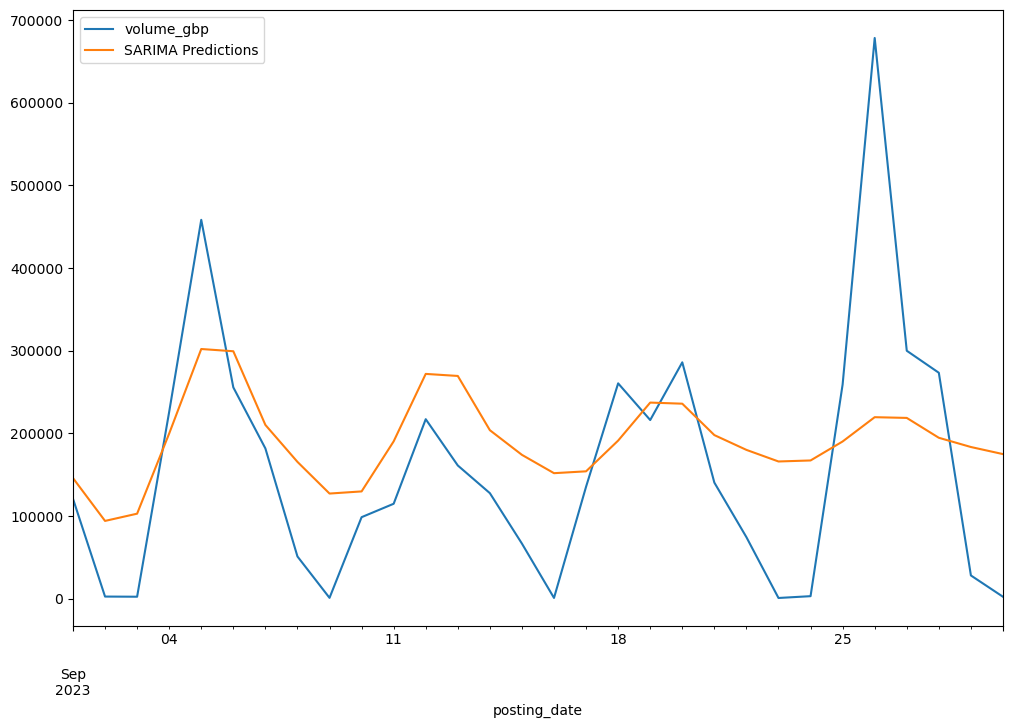

In [44]:
# Predict and plot against test dataset
prediction_sarima = results_sarima.predict(start,end).rename('SARIMA Predictions')
test['volume_gbp'].plot(legend= True, figsize = (12,8))
prediction_sarima.plot(legend = True)
plt.show()

# Evaluate model

In [45]:
error_1 = rmse(test['volume_gbp'], prediction_sarima)

In [46]:
error_1

128596.49736349155

In [47]:
test['volume_gbp'].mean()

158117.8123333333

In [48]:
error_1/test['volume_gbp'].mean()

0.813295450182381

- From the plot above we see that the sarima model does not perform as well as the arima model, in terms of forecasting. 
- The error is quite high relative to the mean test data volume, at 83%.
- We have strong indication to opt for the arima model.

# Forecast into future 

In [49]:
# Forecast
forecast_sarima = results_sarima.predict(start=start+30, end = end + 31)
forecast_sarima

2023-10-01    175662.385858
2023-10-02    189814.839181
2023-10-03    207693.235765
2023-10-04    207153.262655
2023-10-05    192460.428255
2023-10-06    185597.251511
2023-10-07    180279.892825
2023-10-08    180750.064333
2023-10-09    189476.479637
2023-10-10    200555.369178
2023-10-11    200213.314936
2023-10-12    191110.620460
2023-10-13    186863.417424
2023-10-14    183581.153743
2023-10-15    183866.721619
2023-10-16    189243.019778
2023-10-17    196057.898000
2023-10-18    195840.980963
2023-10-19    190226.620610
2023-10-20    187601.650035
2023-10-21    185569.292126
2023-10-22    185738.509379
2023-10-23    189048.787131
2023-10-24    193249.494154
2023-10-25    193109.065423
2023-10-26    189637.322869
2023-10-27    188011.129395
2023-10-28    186751.142142
2023-10-29    186849.167225
2023-10-30    188884.769291
2023-10-31    191468.979494
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='posting_date'>

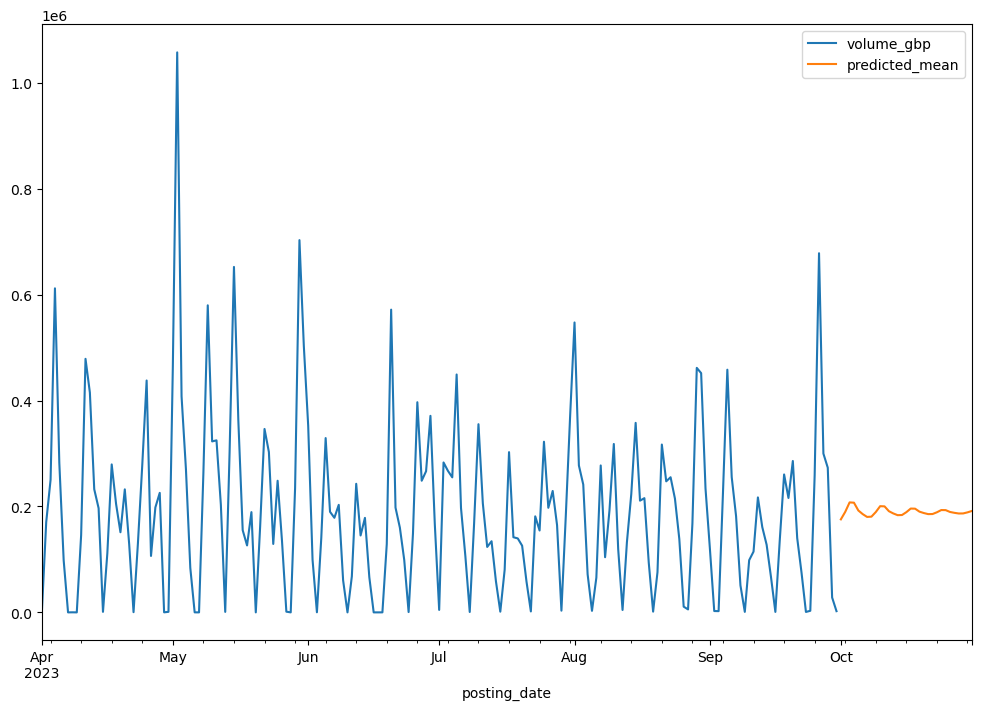

In [50]:
#gbp_volume_up_to_oct = gbp_volume.loc[:'2023-09-30']
gbp_volume_up_to_oct['volume_gbp'].plot(legend = True, figsize= (12,8))
forecast_sarima.plot(legend = True)

# Outcome and next steps

- From the above we see that the model with the best fit that produces more accurate estimations is the ARIMA(6,0,2).
- The model provides a moderate level of reliability, explaining 37-54% of the variability in forecasts. It serves as a good starting point towards estimating future transfer volumes.
- Moving forward, we can either proceed with this model for forecasting or explore alternative approaches that might improve the estimation accuracy.

# APPENDIX

In [51]:
# Kruskal-Wallis Test

from scipy.stats import kruskal

# Load the dataset
gbp_volume = pd.read_csv('take_home_task_dataset.csv')

# Convert posting_date to datetime and add a quarter column
gbp_volume['posting_date'] = pd.to_datetime(gbp_volume['posting_date'])
gbp_volume['quarter'] = gbp_volume['posting_date'].dt.to_period('Q')

# Subset data by quarter for comparison
q2_data = gbp_volume[gbp_volume['quarter'] == '2023Q2']['volume_gbp']
q3_data = gbp_volume[gbp_volume['quarter'] == '2023Q3']['volume_gbp']
q4_data = gbp_volume[gbp_volume['quarter'] == '2023Q4']['volume_gbp']

# Perform Kruskal-Wallis test
kruskal_test_stat, kruskal_p_value = kruskal(q2_data, q3_data, q4_data)

# Display results
print(f"P-value: {kruskal_p_value}")

P-value: 0.9641772087422735
